In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
profile_ids = [783214, 19568591, 103018203, 256881576, 810619093749559296]

# MeToo Classification MSE

In [3]:
experiment_name = '16_metoo'

In [4]:
labels = ['BoW', 'Tfidf BoW', 'Embeddings', 'BoC']

In [5]:
algorithms = ['1B_bow', '1C_tfidf', '1D_embedding', '1E_boc']

In [6]:
algorithms_dict = {}

In [7]:
for algorithm_name in algorithms:
    with open(f'/home/nils/Documents/thesis/data/{algorithm_name}_mse.csv', 'r', encoding='utf-8') as f:
        df = pd.read_csv(f, index_col=0)
    algorithms_dict[algorithm_name] = df

In [8]:
profile_mse_df = pd.DataFrame.from_dict(
    {
        algorithm_name: {
            user_id: float(algorithms_dict[algorithm_name].loc[user_id].values)
            for user_id in profile_ids
        }
        for algorithm_name in algorithms
    },
    orient='columns'
)

profile_mse_df.rename(
    {
        '1B_bow': 'BoW', 
        '1C_tfidf': 'Tf-idf', 
        '1D_embeddings': 'Embeddings', 
        '1E_boc': 'BoC'
    },
    axis='columns',
    inplace=True
)

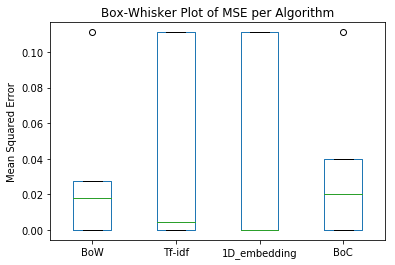

In [9]:
profile_mse_df.boxplot(
    showfliers=True, 
    showmeans=False, 
    meanline=True, 
    grid=False
)
plt.title('Box-Whisker Plot of MSE per Algorithm')
plt.ylabel('Mean Squared Error')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_boxplot.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [10]:
algorithm_mse_df = pd.DataFrame.from_dict(
    {
        algorithm_name: {
            'Mean of Errors': np.mean(
                [
                    algorithms_dict[algorithm_name].loc[user_id]
                    for user_id in profile_ids
                ]
            )
        }
        for algorithm_name in algorithms
    },
    orient='index'
)

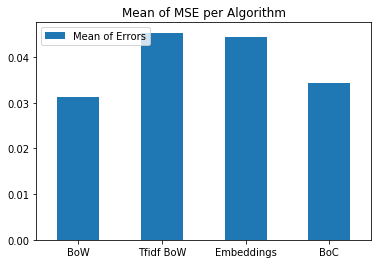

In [11]:
algorithm_mse_df.plot(kind='bar', title=f'Mean of MSE per Algorithm', legend=True, rot=0)
plt.xticks(np.arange(len(labels)), labels, rotation=0)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [12]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}.tex', 'w') as f:
    algorithm_mse_df.to_latex(f)

# Profile Classification MSE

In [13]:
experiment_name = '16_profiles'

In [14]:
algorithms = ['6A_bow', '6B_tfidf', '6C_embeddings', '6D_boc']

In [15]:
algorithms_dict = {}

In [16]:
for algorithm_name in algorithms:
    with open(f'/home/nils/Documents/thesis/data/{algorithm_name}_mse.csv', 'r', encoding='utf-8') as f:
        df = pd.read_csv(f, index_col=0)
    algorithms_dict[algorithm_name] = df

In [17]:
profile_mse_df = pd.DataFrame.from_dict(
    {
        algorithm_name: {
            user_id: float(algorithms_dict[algorithm_name].loc[user_id].values)
            for user_id in profile_ids
        }
        for algorithm_name in algorithms
    },
    orient='columns'
)

profile_mse_df.rename(
    {
        '6A_bow': 'BoW', 
        '6B_tfidf': 'Tf-idf', 
        '6C_embeddings': 'Embeddings', 
        '6D_boc': 'BoC'
    },
    axis='columns',
    inplace=True
)

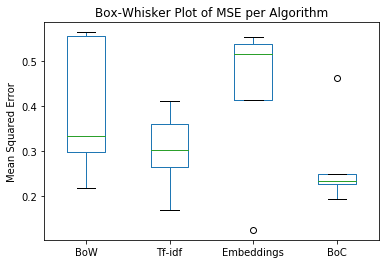

In [18]:
profile_mse_df.boxplot(
    showfliers=True, 
    showmeans=False, 
    meanline=True, 
    grid=False
)
plt.title('Box-Whisker Plot of MSE per Algorithm')
plt.ylabel('Mean Squared Error')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_boxplot.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [19]:
algorithm_mse_df = pd.DataFrame.from_dict(
    {
        algorithm_name: {
            'Mean of Errors': np.mean(
                [
                    algorithms_dict[algorithm_name].loc[user_id]
                    for user_id in profile_ids
                ]
            )
        }
        for algorithm_name in algorithms
    },
    orient='index'
)

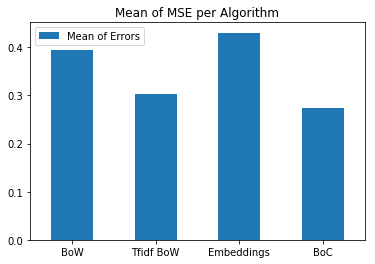

In [20]:
algorithm_mse_df.plot(kind='bar', title=f'Mean of MSE per Algorithm', legend=True, rot=0)
labels = ['BoW', 'Tfidf BoW', 'Embeddings', 'BoC']
plt.xticks(np.arange(len(labels)), labels, rotation=0)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [21]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}.tex', 'w') as f:
    algorithm_mse_df.to_latex(f)